# Análise de dados geográficos das áreas de mangues no Brasil e Sergipe - IBAMA

O Instituto Brasileiro do Meio Ambiente e dos Recursos Naturais Renováveis, mais conhecido pelo acrônimo IBAMA, criado pela Lei nº 7.735 de 22 de fevereiro de 1989, é uma autarquia federal vinculada ao Ministério do Meio Ambiente e Mudança do Clima. E ela possui várias atribuições, assim como disponibiliza dados sobre os dados de localização de mangues demarcados em todo o Brasil no site do [dados abertos](https://dados.gov.br/dados/conjuntos-dados/vegetacao-de-mangue-brasileira1), vinculado ao governo federal.

<center><img alt="Logo IBAMA" width="10%" src="https://upload.wikimedia.org/wikipedia/commons/8/81/Logo_IBAMA.svg"></center>

**Neste *notebook*, iremos analisar os dados geoespaciais referentes à localização de mangues no Brasil e no estado de Sergipe, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [portal de dados abertos](https://dados.gov.br/dados/conjuntos-dados/vegetacao-de-mangue-brasileira1).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo, presente na aba 'recursos':

* `shp-zip` - *SHP-ZIP - Vegetação de mangue*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](https://dados.gov.br/dados/conjuntos-dados/vegetacao-de-mangue-brasileira1) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Pensando nisso, disponibilizamos [aqui](https://github.com/engafs/vegetacao_mangue_br/tree/master/shapefile_areas_mangues) o conjunto que utilizamos, para que você sempre consiga utilizar esse material. Lembrando que todos os arquivos precisam ser baixados para que funcionem corretamente.

Com isso em mente, vamos ao projeto.

In [1]:
# Importação das bibliotecas necessárias
import geopandas as gpd
import matplotlib.pyplot as plt
from numpy import arange

%matplotlib inline

In [2]:
# Criação de uma função para geração de gráficos de contagem de elementos
def grafico_barra(dados: gpd.GeoDataFrame, coluna: str,
                  qt_barra: int, titulo: str) -> None:
    """Função para geração dos gráficos de barras de acordo com a coluna
       desejada, utilizando a contagem de cada valor da coluna.
       
       :param dados: Dados a serem utilizados para geração do gráfico
       :type dados: pd.DataFrame
       :param coluna: Nome da coluna para contagem dos valores dela
       :type coluna: str
       :param qt_barra: Quantidade de barras a serem exibidas no gráfico
       :type qt_barra: str
       :param titulo: Nome do título do gráfico de barra
       :type titulo: str
    """
    plt.figure(figsize=(15, 5))
    if qt_barra >= 10:
        dados.value_counts(coluna)[:qt_barra].sort_values().plot(
            kind='barh', color=plt.cm.Set1(arange(qt_barra-1, -1, -1)))
        plt.xticks(fontsize=20, rotation=0)
        plt.xlabel('Contagem', fontdict={'fontsize': 20})
        plt.yticks(fontsize=15)
    else:
        dados.value_counts(coluna)[:qt_barra].plot(
            kind='bar', color=plt.cm.Set2(arange(qt_barra)))
        plt.xticks(rotation=0, fontsize=20)
        plt.ylabel('Contagem', fontdict={'fontsize': 20})
        plt.yticks(fontsize=20)
    plt.title(titulo, fontdict={'fontsize': 20, 'fontweight':'bold'})
    plt.show();
    return None

In [3]:
# Carregamento dos dados e vetores espaciais referentes ao bioma manguezal em todo o Brasil
mangues_br: gpd.GeoDataFrame = gpd.read_file(
    'shapefile_areas_mangues/veg_mangue_a.shp')

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `nome` - nome da vegetação da área demarcada
* `nomeabrev` - abreviação do nome da propriedade anunciada
* `geometriaa` - numero da geometria da área demarcada
* `denso` - tipo da densidade de população presente naquela área demarcada
* `antropizad` - verificação de pessoas presentes naquela área demarcada
* `classifica` - classificação do tipo da área demarcada
* `area_ha` - medida da área demarcada, em hectares
* `bioma` - tipo de bioma onde aquela área demarcada está inserida
* `uf` - estado onde aquela área demarcada está inserida
* `ecossist` - tipo de ecossistema presente naquela área demarcada
* `op` - especificação técnica do tipo de satélite de demarcou a área  
* `data_img` - data de quando a área foi demarcada pelo satélite
* `sensor` - tipo de satélite que registrou a área demarcada
* `comentario` - comentário sobre a data das áreas demarcadas
* `nu_area_m2` - medida da área demarcada, em metros quadrados
* `geometry` - tipo de geometria espacial da área demarcada pelo satélite

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# Visualização das 5 primeiras linhas do dataframe do dados referentes ao Brasil
mangues_br.head()

,nome,nomeabrev,geometriaa,denso,antropizad,classifica,area_ha,bioma,uf,ecossit,op,data_img,sensor,comentario,nu_area_m2,geometry
0,Mangue,None,2,0,0,0,864.922038,MATA ATLANTICA,SE,Mangue,T24LYP,2018-07-12,Sentinel 2B,Atualização de 2018,8.649220e+06,"POLYGON ((-36.46965 -10.49837, -36.46951 -10.4..."
1,Mangue,None,2,0,0,0,2.208704,CAATINGA,CE,Mangue,T24MVB,2018-08-27,Sentinel,Atualização 2018,2.208704e+04,"POLYGON ((-39.43240 -3.20642, -39.43096 -3.206..."
2,Mangue,None,2,0,0,0,1.133829,CAATINGA,CE,Mangue,T24MVB,2018-08-27,Sentinel,Atualização 2018,1.133829e+04,"POLYGON ((-39.48198 -3.20812, -39.48186 -3.207..."
3,Mangue,None,2,0,0,0,3.487234,CAATINGA,CE,Mangue,T24MVB,2018-08-27,Sentinel,Atualização 2018,3.487234e+04,"POLYGON ((-39.05821 -3.41186, -39.05905 -3.411..."
4,Mangue,None,2,0,0,0,5.167607,CAATINGA,CE,Mangue,T24MWA,2018-08-27,Sentinel,Atualização 2018,5.167607e+04,"POLYGON ((-38.60457 -3.70684, -38.60460 -3.707..."


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

In [5]:
# Dimensão de linhas e colunas referentes aos dados do Brasil
mangues_br.shape

(6977, 16)

In [6]:
# Verificar os tipos das colunas presentes no dataframe
mangues_br.dtypes

nome            object
nomeabrev       object
geometriaa       int64
denso            int64
antropizad       int64
classifica       int64
area_ha        float64
bioma           object
uf              object
ecossit         object
op              object
data_img        object
sensor          object
comentario      object
nu_area_m2     float64
geometry      geometry
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `nomeabrev` possui 100% dos seus valores faltantes.
* A variável `geometry` têm aproximadamente 0,6% dos valores nulos.

Aqui o que importa mesmo é eliminar os registros que não possui as áreas demarcadas, mesmo que tenham as áreas preenchidas

In [7]:
# Ordenar em ordem decrescente as variáveis por seus valores ausentes
(mangues_br.isnull().sum() / mangues_br.shape[0]).sort_values(ascending=False)

nomeabrev     1.000000
bioma         0.398882
nome          0.025656
geometry      0.006736
comentario    0.002437
sensor        0.000573
geometriaa    0.000000
denso         0.000000
antropizad    0.000000
classifica    0.000000
area_ha       0.000000
uf            0.000000
ecossit       0.000000
op            0.000000
data_img      0.000000
nu_area_m2    0.000000
dtype: float64

In [8]:
# Removendo todos os registros que não possuem a geometria da área demarcada
mangues_br.dropna(subset='geometry', inplace=True)

In [9]:
# Dimensão de linhas e colunas referentes aos dados do Brasil após remoção de registros
mangues_br.shape

(6930, 16)

In [10]:
# Ordenar em ordem decrescente as variáveis por seus valores ausentes
(mangues_br.isnull().sum() / mangues_br.shape[0]).sort_values(ascending=False)

nomeabrev     1.000000
bioma         0.400000
nome          0.025108
comentario    0.002165
sensor        0.000144
geometriaa    0.000000
denso         0.000000
antropizad    0.000000
classifica    0.000000
area_ha       0.000000
uf            0.000000
ecossit       0.000000
op            0.000000
data_img      0.000000
nu_area_m2    0.000000
geometry      0.000000
dtype: float64

### **Q3. Análise geral dos dados de áreas demarcadas como mangue no Brasil**

In [11]:
# Soma da área total de vegetação de mangue no Brasil, em hectares e m2
print(f'Área total - mangue (ha): {round(mangues_br.area_ha.sum(), 2)}')
print(f'Área total - mangue (m2): {round(mangues_br.nu_area_m2.sum(), 2)}')

Área total - mangue (ha): 1423609.87
Área total - mangue (m2): 14236098670.33


In [12]:
# Contagem dos satélites que fizeram a demarcação das áreas de mangue
mangues_br.value_counts('sensor')

sensor
Sentinel 2A      5577
Sentinel          755
Landsat 8         409
Sentinel 2B       124
RapidEye           22
sentinel           11
Senitnel            9
Sentinel 2 A        8
Sentinel 2          7
SENTINEL            4
SEntinel            1
Sentinel 2018       1
Sentinel A2         1
Name: count, dtype: int64

In [13]:
# Contagem de área demarcadas como mangue em cada estado do Brasil
mangues_br.value_counts('uf')

uf
MA    1263
BA    1166
PA    1081
SP     462
CE     446
PR     423
SE     407
SC     278
RN     270
AP     207
PE     203
AL     180
RJ     165
PI     135
ES     134
PB     110
Name: count, dtype: int64

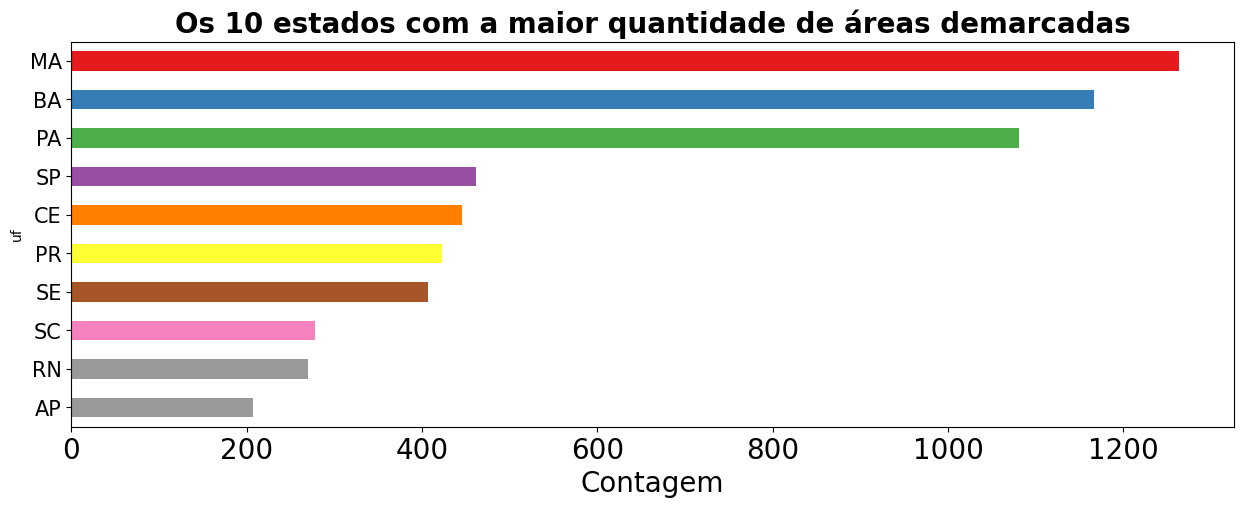

In [14]:
# Gráfico de barra com os 10 estados com mais áreas demarcadas como mangues
grafico_barra(mangues_br, 'uf',
              10, 'Os 10 estados com a maior quantidade de áreas demarcadas')

In [15]:
# Criação de um novo dataframe com a soma da área total de mangue presente em cada estado
area_mangues_uf: gpd.GeoDataFrame = mangues_br.groupby(
    'uf', as_index=False).agg(
        {'area_ha': 'sum', 'nu_area_m2': 'sum', 'uf': 'count'})
area_mangues_uf['media_ha_area_demarc'] = round(
    area_mangues_uf['area_ha'] / area_mangues_uf['uf'], 2)
area_mangues_uf['area_total_%'] = round(
    area_mangues_uf['area_ha'] / mangues_br.area_ha.sum(), 2) * 100
estados_br: list[str] = ['AL', 'AP', 'BA', 'CE', 'ES', 'MA', 'PA', 'PB',
                         'PE', 'PI', 'PR', 'RJ', 'RN', 'SC', 'SE', 'SP']
area_mangues_uf.insert(0,'estado', estados_br)
area_mangues_uf.rename(columns={"uf": "qt_reserva"}, inplace=True)
area_mangues_uf.sort_values('area_ha', ascending=False, inplace=True)

In [16]:
area_mangues_uf.head(16)

,estado,area_ha,nu_area_m2,qt_reserva,media_ha_area_demarc,area_total_%
5,MA,498413.402119,4.984134e+09,1263,394.63,35.0
6,PA,433132.972579,4.331330e+09,1081,400.68,30.0
1,AP,222390.160309,2.223902e+09,207,1074.35,16.0
2,BA,86524.146074,8.652415e+08,1166,74.21,6.0
10,PR,31187.037471,3.118704e+08,423,73.73,2.0
14,SE,26067.328994,2.606733e+08,407,64.05,2.0
15,SP,23676.339419,2.367634e+08,462,51.25,2.0
3,CE,17233.336243,1.723334e+08,446,38.64,1.0
8,PE,15839.499972,1.583950e+08,203,78.03,1.0
11,RJ,13950.872788,1.395087e+08,165,84.55,1.0


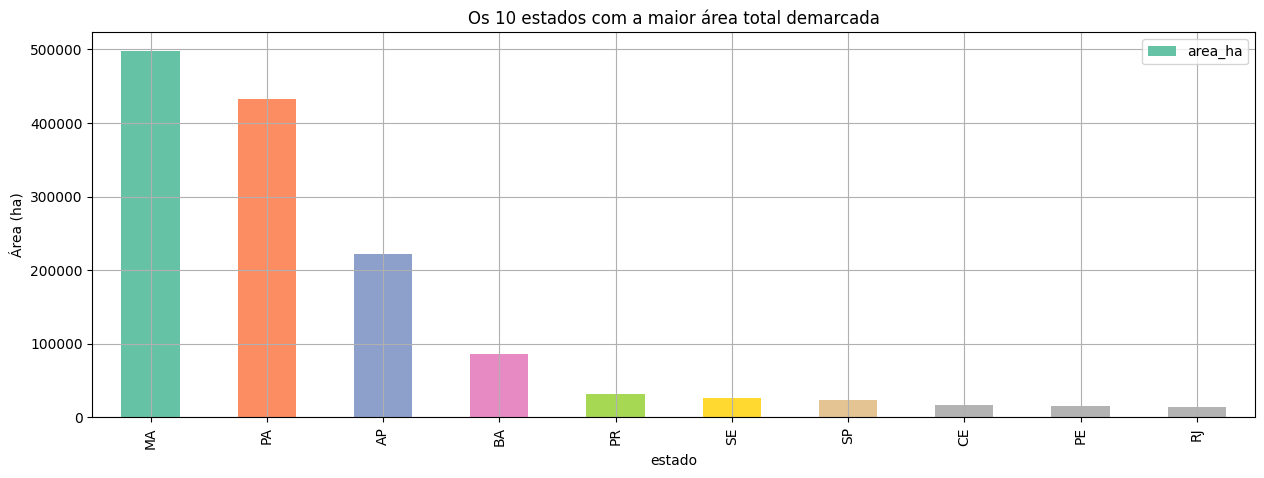

In [17]:
area_mangues_uf[:10].plot(
    x="estado",
    y="area_ha",
    ylabel='Área (ha)',
    kind="bar",
    grid=True,
    figsize=(15, 5),
    color=plt.cm.Set2(arange(10)),
    title='Os 10 estados com a maior área total demarcada');

### **Q4. Há *outliers* presentes nas áreas demarcadas de mangues no Brasil?**

Como verificar a presença de valores discrepantes nas áreas demarcadas como mangues?

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [18]:
# Descrição estatística da área dos mangues no Brasil
mangues_br[['area_ha', 'nu_area_m2']].describe()

,area_ha,nu_area_m2
count,6930.000000,6.930000e+03
mean,205.427109,2.054271e+06
std,1621.561531,1.621562e+07
min,0.000003,2.870000e-02
25%,6.164772,6.164772e+04
50%,24.152341,2.415234e+05
75%,99.375233,9.937523e+05
max,109945.754859,1.099458e+09


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `area_ha` possui um desvio padrão bastante elevado em relação as áreas demarcadas como mangue.

#### Boxplot para `area_ha`

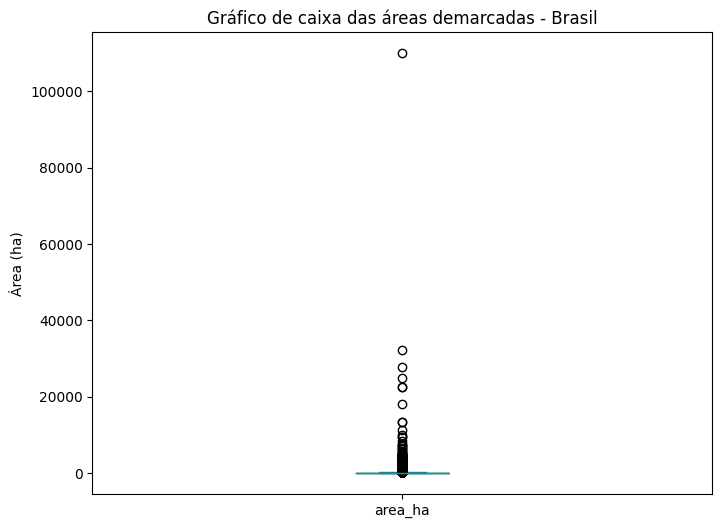

In [19]:
# Visualização dos dados estatísticos das áreas de mangue (ha) no Brasil através do gráfico de caixa (boxplot)
mangues_br.area_ha.plot(
    kind='box', figsize=(8, 6),
    ylabel='Área (ha)', title='Gráfico de caixa das áreas demarcadas - Brasil');

### **Q5. Descrição estatística dos outliers das áreas demarcadas de mangues no Brasil**

In [20]:
# Separação das demarcações de mangues consideradas como outliers - Brasil
outliers_mangues_br: gpd.GeoDataFrame = mangues_br.loc[mangues_br['area_ha'] > 239.19]

In [21]:
# Visualização dos dados definidos como outliers
outliers_mangues_br.head()

,nome,nomeabrev,geometriaa,denso,antropizad,classifica,area_ha,bioma,uf,ecossit,op,data_img,sensor,comentario,nu_area_m2,geometry
0,Mangue,None,2,0,0,0,864.922038,MATA ATLANTICA,SE,Mangue,T24LYP,2018-07-12,Sentinel 2B,Atualização de 2018,8.649220e+06,"POLYGON ((-36.46965 -10.49837, -36.46951 -10.4..."
40,Mangue,None,2,0,0,0,311.577023,MATA ATLANTICA,SP,Mangue,T22JGT,2018-01-05,Sentinel 2A,Atualização 2018,3.115770e+06,"MULTIPOLYGON (((-48.01861 -25.07216, -48.01757..."
49,Mangue,None,2,0,0,0,1235.072375,MATA ATLANTICA,PR,Mangue,T22JGS,2018-12-11,Sentinel 2A,Atualização 2018,1.235072e+07,"POLYGON ((-48.30512 -25.34526, -48.30475 -25.3..."
83,Mangue,None,2,0,0,0,1423.939752,None,BA,Mangue,T24LVK,2018-12-07,Sentinel 2A,Atualização 2018,1.423940e+07,"POLYGON ((-39.08211 -13.83067, -39.08156 -13.8..."
102,Mangue,None,2,0,0,0,1600.493453,CERRADO,MA,Mangue,T23MPT,2018-02-24,Sentinel 2A,Atualiza 2o de 2018,1.600493e+07,"POLYGON ((-43.46831 -2.52499, -43.46734 -2.524..."


In [22]:
# Quantidade de áreas definidas como outliers no Brasil
outliers_mangues_br.shape

(935, 16)

In [23]:
# Descrição estatística dos outliers das áreas dos mangues no Brasil
outliers_mangues_br[['area_ha', 'nu_area_m2']].describe()

,area_ha,nu_area_m2
count,935.000000,9.350000e+02
mean,1262.468883,1.262469e+07
std,4265.718743,4.265719e+07
min,239.657994,2.396580e+06
25%,335.062867,3.350629e+06
50%,518.884597,5.188846e+06
75%,1079.864577,1.079865e+07
max,109945.754859,1.099458e+09


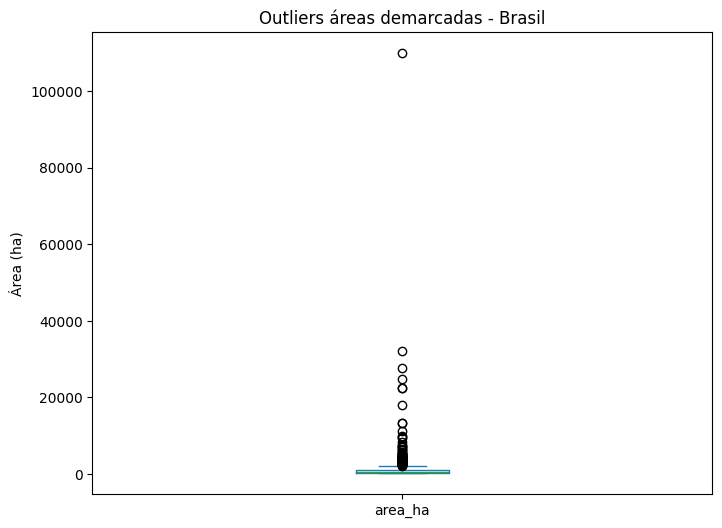

In [24]:
# Gráfico de caixa dos outliers
outliers_mangues_br.area_ha.plot(
    kind='box', figsize=(8, 6),
    ylabel='Área (ha)', title='Outliers áreas demarcadas - Brasil');

### **Q6. Geração do mapa com as áreas demarcadas de mangues no Brasil**

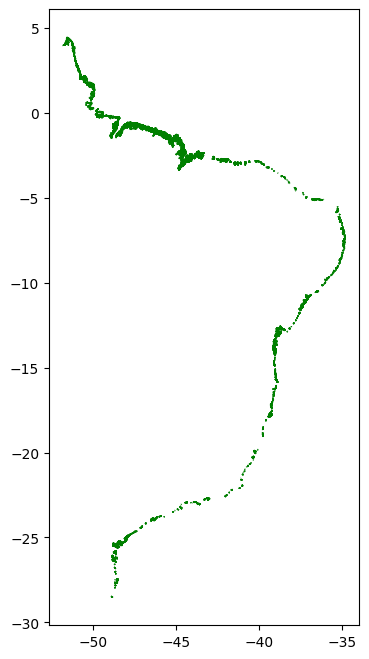

In [25]:
# Plotar o gráfico dos polígonos dos manguezais em todo o Brasil
mangues_br.plot(figsize=(10, 8), edgecolor='green');

In [26]:
# Carregamento dos dados vetoriais referente ao Brasil
shapefile_br: gpd.GeoDataFrame = gpd.read_file('shapefile_br/BR_UF_2022.shp')

In [27]:
# Visualização das 5 primeiras linhas dos dados vetoriais do Brasil
shapefile_br.head()

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,AREA_KM2,geometry
0,12,Acre,AC,Norte,164173.429,"POLYGON ((-68.79282 -10.99957, -68.79367 -10.9..."
1,13,Amazonas,AM,Norte,1559255.881,"POLYGON ((-56.76292 -3.23221, -56.76789 -3.242..."
2,15,Pará,PA,Norte,1245870.704,"MULTIPOLYGON (((-48.97548 -0.19834, -48.97487 ..."
3,16,Amapá,AP,Norte,142470.762,"MULTIPOLYGON (((-51.04561 -0.05088, -51.05422 ..."
4,17,Tocantins,TO,Norte,277423.627,"POLYGON ((-48.24830 -13.19239, -48.24844 -13.1..."


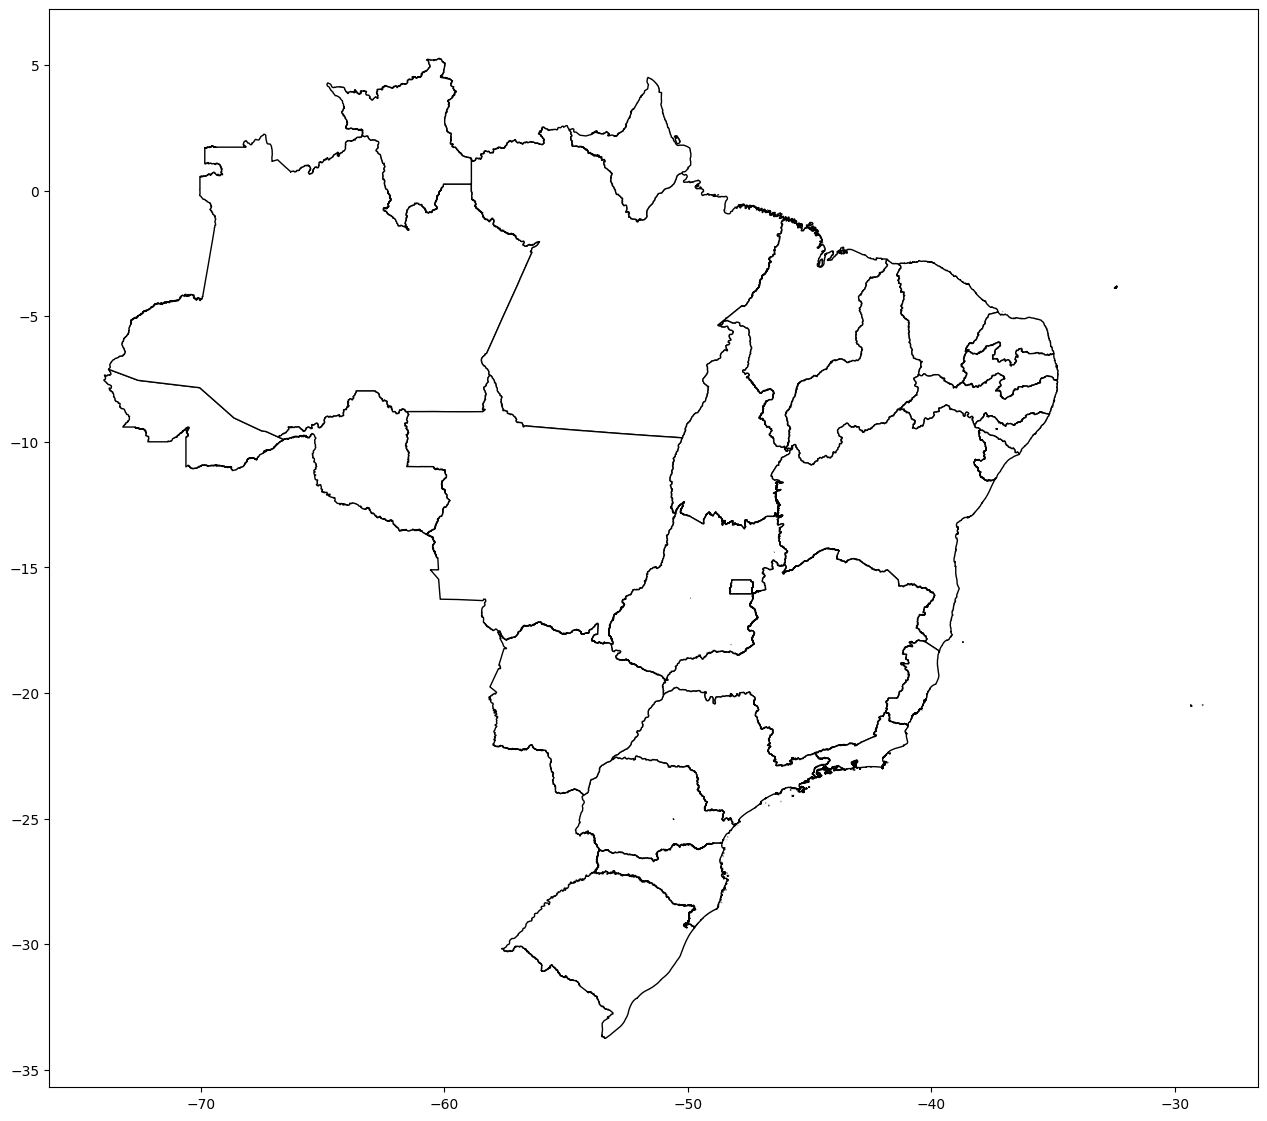

In [28]:
# Visualização do poligono referente ao Brasil
shapefile_br.plot(figsize=(16, 14), facecolor='white', edgecolor='black');

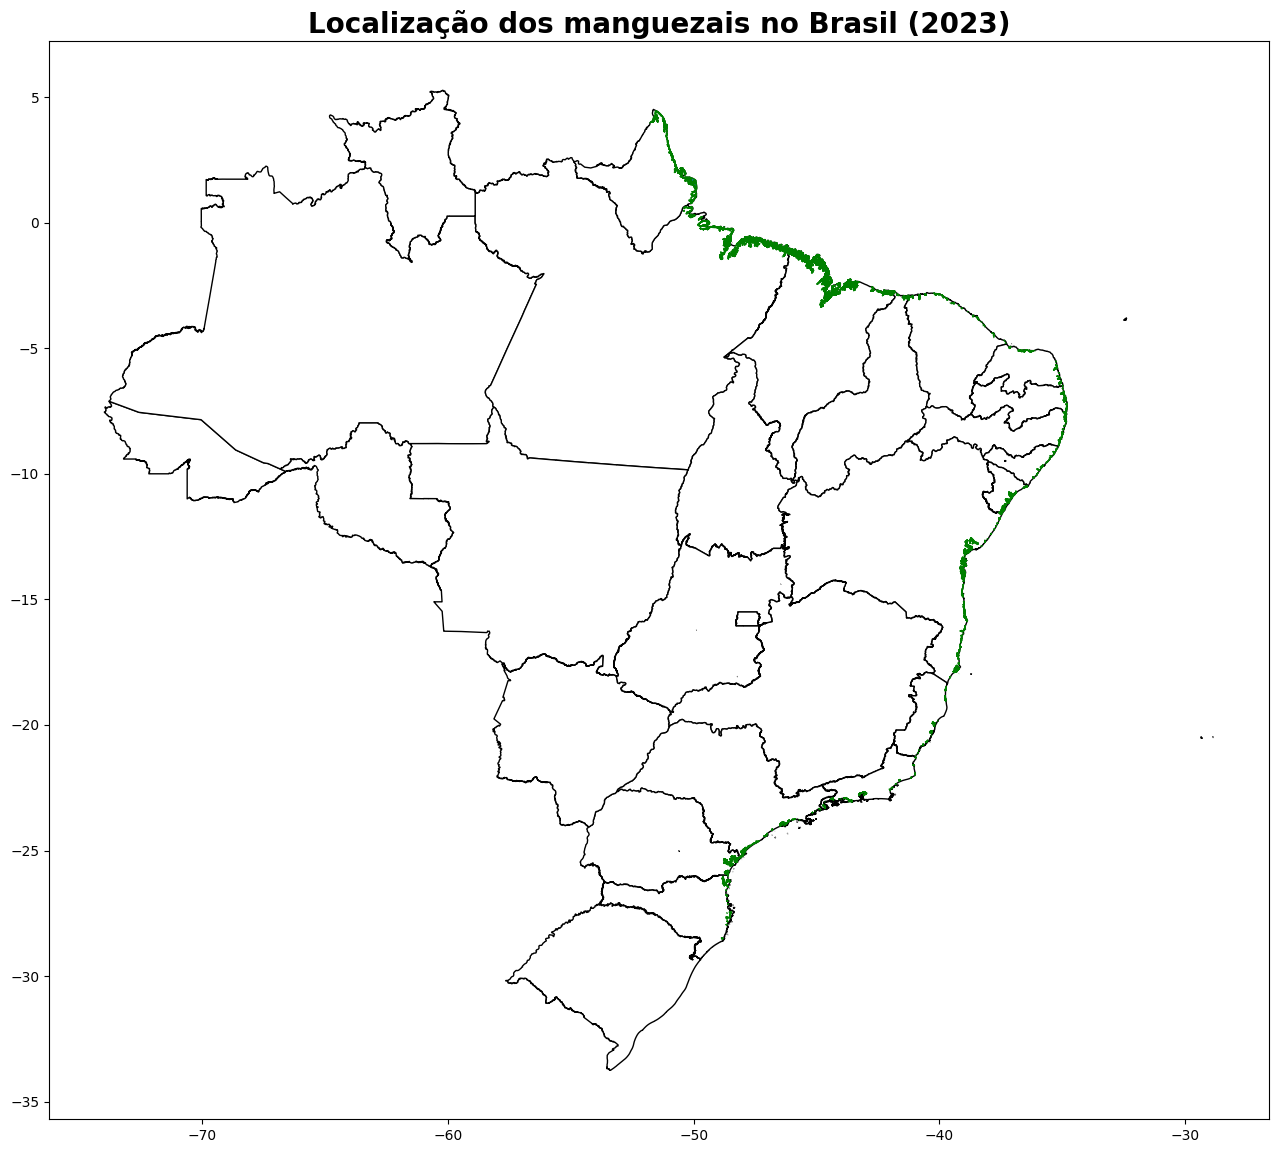

In [29]:
# Visualização da localização dos manguezais no Brasil
fig, ax = plt.subplots(figsize=(16, 14))

ax.set_title("Localização dos manguezais no Brasil (2023)",
             fontdict={'fontsize': 20, 'fontweight': 'bold'})
shapefile_br.plot(ax=ax, facecolor='white', edgecolor='black')
mangues_br.plot(ax=ax, edgecolor='green');

### **Q7. Análise geral dos dados de áreas demarcadas como mangue em Sergipe**

In [30]:
# Separação dos dados e vetores espaciais referentes ao bioma manguezal no estado de Sergipe
mangues_se: gpd.GeoDataFrame = mangues_br.loc[mangues_br['uf'] == 'SE']

In [31]:
# Visualização das 5 primeiras linhas do dataframe do dados referentes a Sergipe
mangues_se.head()

,nome,nomeabrev,geometriaa,denso,antropizad,classifica,area_ha,bioma,uf,ecossit,op,data_img,sensor,comentario,nu_area_m2,geometry
0,Mangue,None,2,0,0,0,864.922038,MATA ATLANTICA,SE,Mangue,T24LYP,2018-07-12,Sentinel 2B,Atualização de 2018,8.649220e+06,"POLYGON ((-36.46965 -10.49837, -36.46951 -10.4..."
194,Mangue,None,2,0,0,0,0.703759,MATA ATLANTICA,SE,Mangue,215067,2015-11-14,Landsat 8,Não alterado,7.037586e+03,"POLYGON ((-37.10419 -10.87866, -37.10403 -10.8..."
195,Mangue,None,2,0,0,0,0.250934,None,SE,Mangue,T24LYP,2018-06-25,Sentinel 2A,Atualizacao 2018,2.509339e+03,"POLYGON ((-36.54445 -10.54271, -36.54465 -10.5..."
196,Mangue,None,2,0,0,0,36.860350,None,SE,Mangue,T24LYP,2018-10-28,Sentinel 2A,Atualização 2018,3.686035e+05,"POLYGON ((-37.02479 -10.89356, -37.02506 -10.8..."
197,Mangue,None,2,0,0,0,18.693074,MATA ATLANTICA,SE,Mangue,T24LYP,2018-10-28,Sentinel 2A,Atualização 2018,1.869307e+05,"POLYGON ((-36.98113 -10.80529, -36.98146 -10.8..."


In [32]:
# Dimensão de linhas e colunas referentes aos dados de Sergipe
mangues_se.shape

(407, 16)

In [33]:
# Ordenar em ordem decrescente as variáveis por seus valores ausentes
(mangues_se.isnull().sum() / mangues_se.shape[0]).sort_values(ascending=False)

nomeabrev     1.000000
bioma         0.405405
nome          0.000000
geometriaa    0.000000
denso         0.000000
antropizad    0.000000
classifica    0.000000
area_ha       0.000000
uf            0.000000
ecossit       0.000000
op            0.000000
data_img      0.000000
sensor        0.000000
comentario    0.000000
nu_area_m2    0.000000
geometry      0.000000
dtype: float64

### **Q8. Análise geral dos dados de áreas demarcadas como mangue em Sergipe**

In [34]:
# Soma da área total de vegetação de mangue no estado de Sergipe, em hectares e m2
print(f'Área total - mangue (ha): {round(mangues_se.area_ha.sum(), 2)}')
print(f'Área total - mangue (m2): {round(mangues_se.nu_area_m2.sum(), 2)}')

Área total - mangue (ha): 26067.33
Área total - mangue (m2): 260673289.94


In [35]:
# Comparação de área de vegetação de mangue em relação ao Brasil
print('Percentual área mangue SE (ha): '
      f'{round(mangues_se.area_ha.sum() / mangues_br.area_ha.sum(), 2)}%')
print('Percentual área mangue SE (m2): '
      f'{round(mangues_se.nu_area_m2.sum() / mangues_br.nu_area_m2.sum(), 2)}%')

Percentual área mangue SE (ha): 0.02%
Percentual área mangue SE (m2): 0.02%


### **Q9. Descrição estatística dos outliers das áreas demarcadas de mangues em Sergipe**

In [36]:
# Descrição estatística da área dos mangues no estado de Sergipe
mangues_se[['area_ha', 'nu_area_m2']].describe()

,area_ha,nu_area_m2
count,407.000000,4.070000e+02
mean,64.047491,6.404749e+05
std,112.139352,1.121394e+06
min,0.081655,8.165488e+02
25%,5.928254,5.928254e+04
50%,22.141840,2.214184e+05
75%,70.316905,7.031690e+05
max,943.993113,9.439931e+06


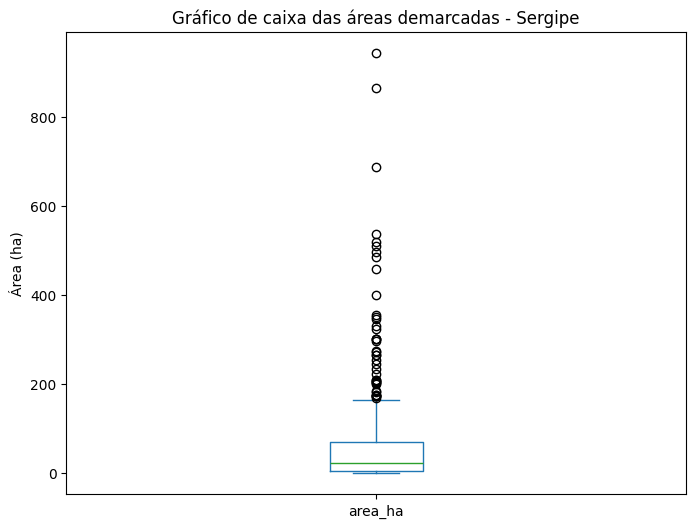

In [37]:
# Visualização dos dados estatísticos das áreas de mangue (ha) em Sergipe através do gráfico de caixa (boxplot)
mangues_se.area_ha.plot(
    kind='box', figsize=(8, 6),
    ylabel='Área (ha)', title='Gráfico de caixa das áreas demarcadas - Sergipe');

### **Q10. Descrição estatística dos outliers das áreas demarcadas de mangues em Sergipe**

In [38]:
# Separação das áreas demarcadas consideradas outliers no estado de Sergipe
outliers_mangues_se: gpd.GeoDataFrame = mangues_se.loc[mangues_br['area_ha'] > 166.9]

In [39]:
# Visualização dos dados considerados outliers
outliers_mangues_se.head()

,nome,nomeabrev,geometriaa,denso,antropizad,classifica,area_ha,bioma,uf,ecossit,op,data_img,sensor,comentario,nu_area_m2,geometry
0,Mangue,None,2,0,0,0,864.922038,MATA ATLANTICA,SE,Mangue,T24LYP,2018-07-12,Sentinel 2B,Atualização de 2018,8.649220e+06,"POLYGON ((-36.46965 -10.49837, -36.46951 -10.4..."
1053,Mangue,None,2,0,0,0,172.429661,None,SE,Mangue,T24LXN,2018-06-25,Sentinel 2A,Atualização 2018,1.724297e+06,"POLYGON ((-37.21320 -11.02444, -37.21312 -11.0..."
1078,Mangue,None,2,0,0,0,510.858675,None,SE,Mangue,215068,2016-01-01,Landsat 8,Não alterado,5.108587e+06,"MULTIPOLYGON (((-37.15953 -11.06750, -37.15885..."
1090,Mangue,None,2,0,0,0,205.671296,None,SE,Mangue,T24LXN,2018-05-26,Sentinel 2A,Atualização 2018,2.056713e+06,"POLYGON ((-37.22307 -11.02280, -37.22278 -11.0..."
1101,Mangue,None,2,0,0,0,202.695037,None,SE,Mangue,T24LYP,2018-06-25,Sentinel 2A,Atualização 2018,2.026950e+06,"POLYGON ((-36.99391 -10.85400, -36.99386 -10.8..."


In [40]:
# Quantidade de áreas demarcadas consideradas outliers no estado de Sergipe
outliers_mangues_se.shape

(42, 16)

In [41]:
# Descrição estatística das áreas considerados como outliers no estado de Sergipe
outliers_mangues_se[['area_ha', 'nu_area_m2']].describe()

,area_ha,nu_area_m2
count,42.000000,4.200000e+01
mean,326.144410,3.261444e+06
std,179.950679,1.799507e+06
min,168.079646,1.680796e+06
25%,205.392446,2.053924e+06
50%,269.728665,2.697287e+06
75%,355.006415,3.550064e+06
max,943.993113,9.439931e+06


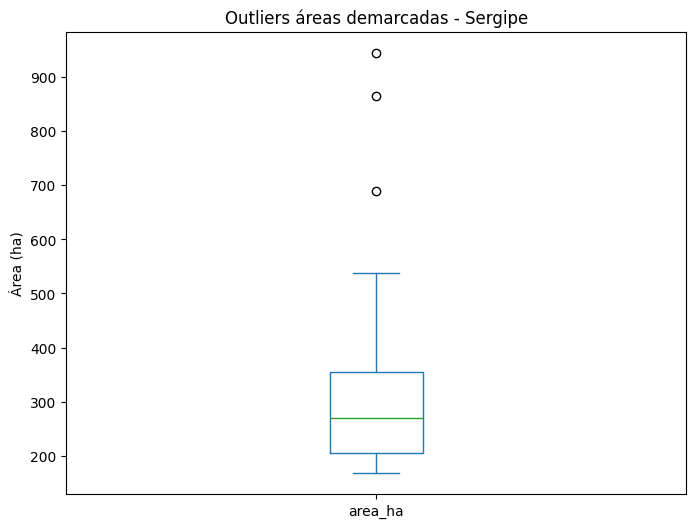

In [42]:
# Gráfico de caixa dos outliers das áreas demarcadas no estado de Sergipe
outliers_mangues_se.area_ha.plot(
    kind='box', figsize=(8, 6),
    ylabel='Área (ha)', title='Outliers áreas demarcadas - Sergipe');

### **Q11. Geração do mapa com as áreas demarcadas de mangues no Brasil**

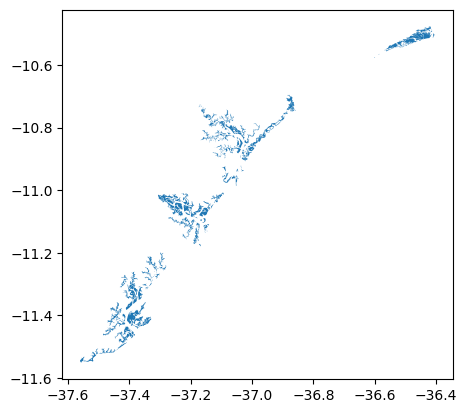

In [44]:
# Plotar o gráfico dos polígonos dos manguezais no estado de Sergipe
mangues_se.plot();

In [45]:
# Carregamento dos dados vetoriais referente ao estado de Sergipe
shapefile_se: gpd.GeoDataFrame = gpd.read_file(
    'shapefile_se/SE_Municipios_2022.shp')

In [46]:
# Visualização das 5 primeiras linhas dos dados vetoriais do estado de Sergipe
shapefile_se.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,2800100,Amparo do São Francisco,SE,35.683,"POLYGON ((-36.92690 -10.12572, -36.92631 -10.1..."
1,2800209,Aquidabã,SE,359.543,"POLYGON ((-37.01690 -10.19101, -36.99479 -10.1..."
2,2800308,Aracaju,SE,182.163,"POLYGON ((-37.03564 -10.95968, -37.03583 -10.9..."
3,2800407,Arauá,SE,198.967,"MULTIPOLYGON (((-37.65625 -11.34042, -37.65625..."
4,2800506,Areia Branca,SE,148.134,"POLYGON ((-37.31622 -10.74069, -37.31518 -10.7..."


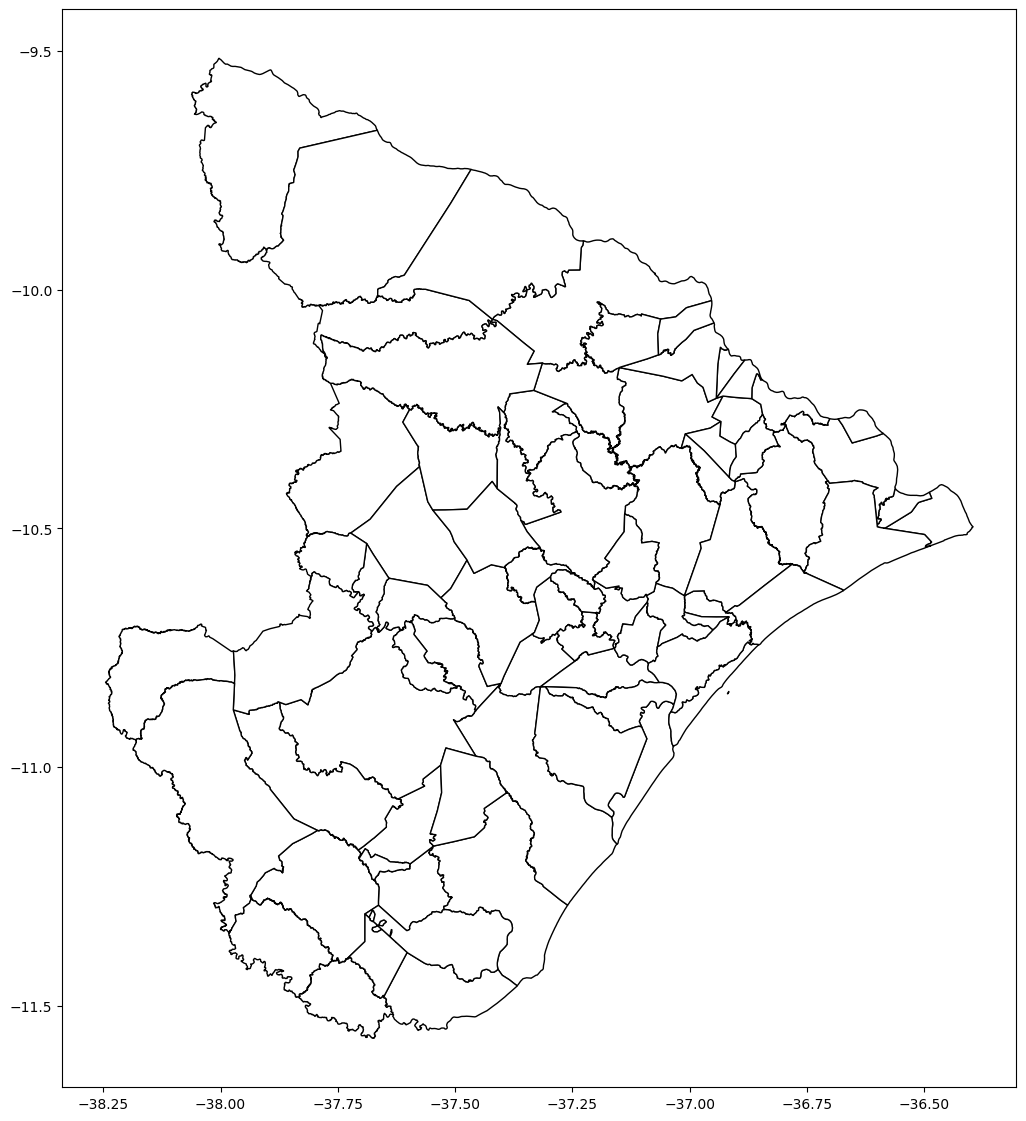

In [47]:
# Visualização do poligono referente ao estado de Sergipe
shapefile_se.plot(figsize=(16, 14), facecolor='white', edgecolor='black');

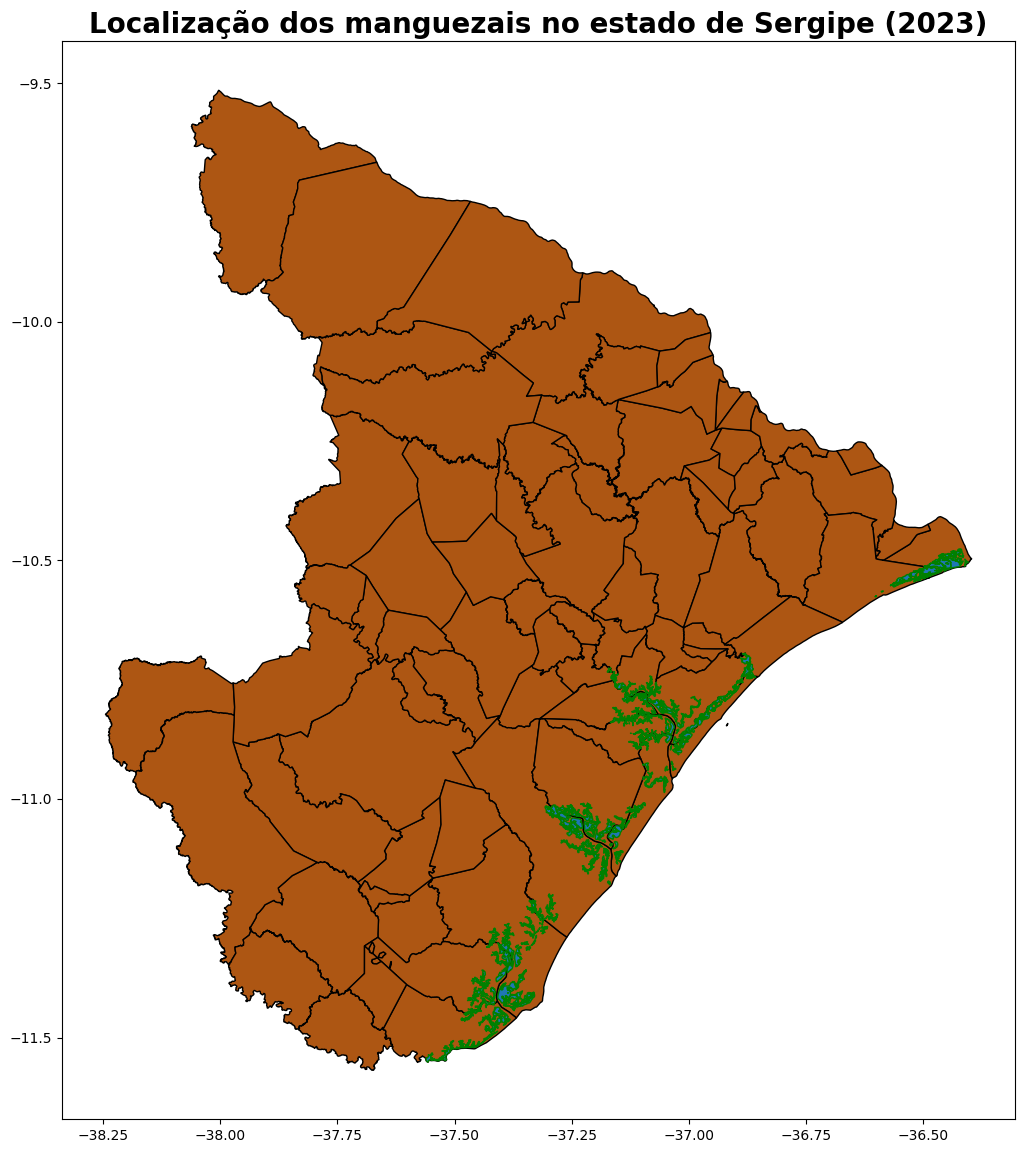

In [48]:
# Visualização da localização dos manguezais no estado de Sergipe
fig, ax = plt.subplots(figsize=(16, 14))

ax.set_title("Localização dos manguezais no estado de Sergipe (2023)",
             fontdict={'fontsize': 20, 'fontweight': 'bold'})
shapefile_se.plot(ax=ax, facecolor='#ad5613', edgecolor='black')
mangues_se.plot(ax=ax, edgecolor='green');

In [49]:
# Geração do arquivo de dados geoespaciais dos mangues no estado de Sergipe
#mangues_se.to_file('mangues_se.gpkg', driver='GPKG')

## Conclusões 

Foi feita apenas uma análise superficial na base de dados das áreas demarcadas como mangue, porém já se percebeu que existem *outliers* na variável de área demarcada.

Percebe-se que o fato de ter muitas áreas demarcadas não quer dizer que o total dessas áreas demarcadas, por estado, seja maior também.

Graças a essa preparação dos dados, foi possível gerar dados a respeito das áreas demarcadas em cada estado, sendo possível separá-las para a geração de vários mapas.